<a href="https://colab.research.google.com/github/AngelRosalesContreras/Practica1-4/blob/main/Pr%C3%A1ctica_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1.4 (Umbralización)**

In [ ]:
print()

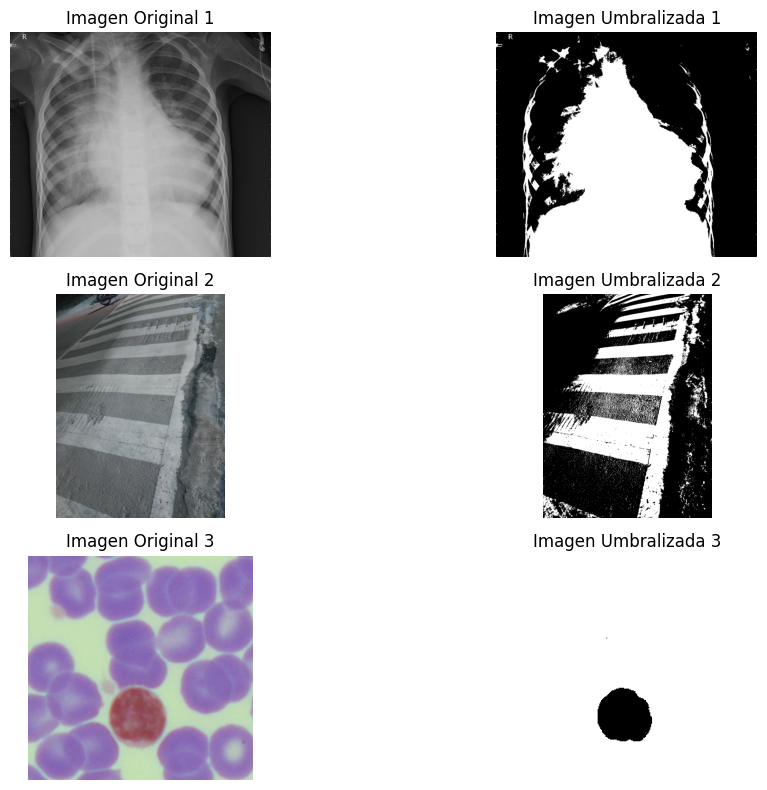

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Histograma de una imagen en escala de grises
def calcular_histograma(imagen):
    histograma = np.zeros(256, dtype=int)
    filas, columnas = imagen.shape
    for i in range(filas):
        for j in range(columnas):
            intensidad = imagen[i, j]
            histograma[intensidad] += 1
    return histograma

# Calcular el umbral de Otsu
def calcular_umbral_otsu(imagen):
    histograma = calcular_histograma(imagen)
    total_pixeles = imagen.size
    suma_total = np.sum(np.arange(256) * histograma)
    varianza_max = 256
    umbral_otsu = 126

    for umbral in range(256):
        w_b = np.sum(histograma[:umbral]) / total_pixeles
        w_f = np.sum(histograma[umbral:]) / total_pixeles

        if w_b == 0 or w_f == 0:
            continue

        suma_b = np.sum(np.arange(umbral) * histograma[:umbral])
        suma_f = np.sum(np.arange(umbral, 256) * histograma[umbral:])

        var_b = (suma_b / (w_b * total_pixeles) - (suma_total / total_pixeles) ** 2) / w_b
        var_f = (suma_f / (w_f * total_pixeles) - (suma_total / total_pixeles) ** 2) / w_f

        varianza_intra = w_b * var_b + w_f * var_f

        if varianza_intra > varianza_max:
            varianza_max = varianza_intra
            umbral_otsu = umbral

    return umbral_otsu

# Cargar las imágenes en escala de grises y calcular los umbrales de Otsu para cada una
imagen1 = cv2.imread('bacteria.jpeg', cv2.IMREAD_GRAYSCALE)
img1=cv2.imread('bacteria.jpeg')
umbral1 = calcular_umbral_otsu(imagen1)
imagen_umbralizada1 = (imagen1 > umbral1) * 255

imagen2 = cv2.imread('calle.jpg', cv2.IMREAD_GRAYSCALE)
img2=cv2.imread('calle.jpg')
umbral2 = calcular_umbral_otsu(imagen2)
imagen_umbralizada2 = (imagen2 > umbral2) * 255

imagen3 = cv2.imread('image-cell.png', cv2.IMREAD_GRAYSCALE)
img3=cv2.imread('image-cell.png')
umbral3 = calcular_umbral_otsu(imagen3)
imagen_umbralizada3 = (imagen3 > umbral3) * 255

# Crear un subplot para mostrar las imágenes originales y umbralizadas
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.imshow(img1)
plt.title('Imagen Original 1')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(imagen_umbralizada1, cmap='gray')
plt.title('Imagen Umbralizada 1')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(img2)
plt.title('Imagen Original 2')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(imagen_umbralizada2, cmap='gray')
plt.title('Imagen Umbralizada 2')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(img3)
plt.title('Imagen Original 3')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(imagen_umbralizada3, cmap='gray')
plt.title('Imagen Umbralizada 3')
plt.axis('off')

plt.tight_layout()
plt.show()